In [1]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_images(directory):
    one_dim = []
    class_names = []
    labels = []
    for filename in os.listdir(directory):
        path = directory + "/" + filename
        t = filename.split('_')
        t = int(t[0])
        if t not in class_names:
            class_names.append(t)
        labels.append(t)
        im = mpimg.imread(path)
        temp = []
        for row in im:
            for w in row:
                temp.append(int(w))
        one_dim.append(temp)

    return one_dim, labels, class_names

In [3]:
trainData , trainLabel, trainClassName = load_images("D:/HomeWork/Pattern/inputs/P2/dataset/c/Train")
testData , testLabel, testClassName = load_images("D:/HomeWork/Pattern/inputs/P2/dataset/c/Test")

In [4]:
def findCentroidData(train, label, nClasses, nFeatures):
    
    centroidData = [[0 for i in range(0, nFeatures)] for i in range(0, nClasses)]
    numberClass = [0 for i in range(0, nClasses)]
    
    for i in range(0, len(train)):
        for j in range(len(centroidData[0])):
            centroidData[label[i]][j] = centroidData[label[i]][j] + train[i][j]
        numberClass[label[i]] += 1
        
    for i in range(0, nClasses):
        centroidData[i] = np.divide(np.array(centroidData[i]), np.array(numberClass[i]))
        
    return centroidData

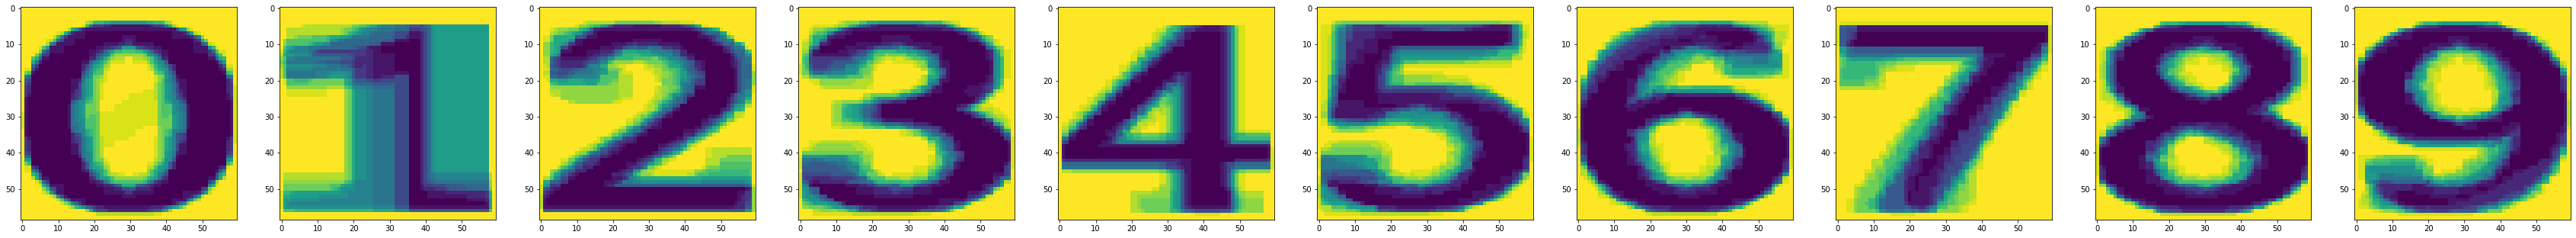

Data with class 0 predicted as class 0 : true predicted
Data with class 0 predicted as class 0 : true predicted
Data with class 0 predicted as class 0 : true predicted
Data with class 0 predicted as class 0 : true predicted
Data with class 0 predicted as class 0 : true predicted
Data with class 0 predicted as class 0 : true predicted
Data with class 0 predicted as class 0 : true predicted
Data with class 0 predicted as class 0 : true predicted
Data with class 0 predicted as class 0 : true predicted
Data with class 0 predicted as class 0 : true predicted
Data with class 1 predicted as class 1 : true predicted
Data with class 1 predicted as class 1 : true predicted
Data with class 1 predicted as class 1 : true predicted
Data with class 1 predicted as class 1 : true predicted
Data with class 1 predicted as class 1 : true predicted
Data with class 1 predicted as class 1 : true predicted
Data with class 1 predicted as class 1 : true predicted
Data with class 1 predicted as class 1 : true pr

In [7]:
centroidData = findCentroidData(trainData , trainLabel , len(trainClassName) , len(trainData[0]))
counter = 1

fig = plt.figure(figsize=(60, 60))
for img in centroidData:
    two_d = []
    for i in range(59):
        two_d.append(img[i * 60:(i + 1) * 60])
    fig.add_subplot(1, 10, counter)
    counter += 1
    plt.imshow(two_d)
plt.show()


calculateError(testData , centroidData , testClassName , testLabel)

In [5]:
def calculateError(testData , centroidData , className , labelTest):
        for i in range(len(testData)):
            prediction = int(predict(testData[i], centroidData,className))
            if labelTest[i] == prediction:
                print("Data with class "+str(labelTest[i])+ " predicted as class "+ str(prediction) + " : true predicted")
            else:
                print("Data with class "+str(labelTest[i])+ " predicted as class "+ str(prediction) + " : false predicted")

In [6]:
def predict(sample, centroidData,className):
    dist = []
    for i in range(len(centroidData)):
        euclidean_distance = 0
        for j in range (len(sample)):
            euclidean_distance +=  (sample[j] - centroidData[i][j]) ** 2
        dist.append([className[i],euclidean_distance])
    dist.sort(key=lambda tup: tup[1])
    return dist[0][0]